In [ ]:
# ===========================
# 📌 STEP 1: MOUNT GOOGLE DRIVE
# ===========================
from google.colab import drive
drive.mount('/content/drive')

# ===========================
# 📌 STEP 2: INSTALL REQUIRED LIBRARIES
# ===========================
!pip install opencv-python numpy pandas face-recognition scikit-image

# ===========================
# 📌 STEP 3: IMPORT REQUIRED LIBRARIES
# ===========================
import cv2
import numpy as np
import pandas as pd
import face_recognition
from skimage import exposure
import os

# ===========================
# 📌 STEP 4: DEFINE IMAGE FOLDER PATH
# ===========================
image_folder_path = "/content/drive/MyDrive/thumbnails"  # Ensure this is correct

# Store analysis results
results = []

# ===========================
# 📌 STEP 5: ANALYZE THUMBNAILS
# ===========================
for filename in os.listdir(image_folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check valid image formats
        image_path = os.path.join(image_folder_path, filename)
        img = cv2.imread(image_path)

        # Get image dimensions
        height, width, _ = img.shape
        resolution = width * height
        aspect_ratio = round(width / height, 2)

        # Convert to RGB for face detection
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Face detection
        face_locations = face_recognition.face_locations(rgb_img)
        num_faces = len(face_locations)
        face_present = 1 if num_faces > 0 else 0

        # Face size ratios
        face_ratios = [
            round(((right - left) * (bottom - top)) / resolution, 4)
            for (top, right, bottom, left) in face_locations
        ]
        face_size_ratios = face_ratios if face_ratios else [0]

        # Convert to HSV for color analysis
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hue_mean = round(np.mean(hsv_img[:, :, 0]), 2)
        saturation_mean = round(np.mean(hsv_img[:, :, 1]), 2)
        brightness_mean = round(np.mean(hsv_img[:, :, 2]), 2)

        # Contrast measurement
        contrast = round(img.std(), 2)

        # Sharpness using Laplacian variance
        sharpness = round(cv2.Laplacian(img, cv2.CV_64F).var(), 2)

        # Estimated gamma correction
        estimated_gamma = round(exposure.adjust_gamma(img, 1.0).mean(), 2)

        # Store data
        results.append([
            filename, face_present, num_faces, face_size_ratios, width, height,
            resolution, aspect_ratio, brightness_mean, contrast, saturation_mean,
            hue_mean, estimated_gamma, sharpness
        ])

# ===========================
# 📌 STEP 6: SAVE RESULTS TO CSV
# ===========================
columns = ["video_id", "face_present", "num_faces", "face_size_ratios", "width", "height",
           "resolution", "aspect_ratio", "brightness", "contrast", "saturation",
           "hue", "estimated_gamma", "sharpness"]

df = pd.DataFrame(results, columns=columns)

# Save CSV in Google Drive
csv_path = "/content/drive/MyDrive/thumbnail_analysis_results.csv"
df.to_csv(csv_path, index=False)

print(f"✅ Analysis completed! Results saved at: {csv_path}")


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=0f224ccb400a0c53140bb43093aa97808c34500194af5679d2abe5f6ad43d9bb
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /root/.cache/uv/sdists-v4/pypi/dlib/19.24.2/BQ7_zK6er4UhnYsQ7mw-B/dlib-19.24.2.tar.gz/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

In [ ]:
# ===========================
# 📌 STEP 1: MOUNT GOOGLE DRIVE
# ===========================
from google.colab import drive
import os
import cv2
import dlib
import numpy as np
import pandas as pd
from tqdm import tqdm
from skimage import exposure

drive.mount('/content/drive')

# ===========================
# 📌 STEP 2: SET IMAGE FOLDER PATH
# ===========================
# Update this path based on your Drive structure
image_folder_path = "/content/drive/MyDrive/thumbnails"

# ===========================
# 📌 STEP 3: LOAD FACE DETECTOR (CPU MODE)
# ===========================
face_detector = dlib.get_frontal_face_detector()

# ===========================
# 📌 STEP 4: PROCESS IMAGES
# ===========================
results = []

for filename in tqdm(os.listdir(image_folder_path)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_folder_path, filename)
        img = cv2.imread(image_path)

        if img is None:
            continue

        # Get image dimensions
        height, width, _ = img.shape
        resolution = width * height
        aspect_ratio = round(width / height, 2)

        # Convert to grayscale for face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Face detection using dlib (CPU-based)
        faces = face_detector(gray)
        num_faces = len(faces)
        face_present = 1 if num_faces > 0 else 0

        # Face size ratios
        face_ratios = [
            round((face.width() * face.height()) / resolution, 4)
            for face in faces
        ]
        face_size_ratios = face_ratios if face_ratios else [0]

        # Convert to HSV for color analysis
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hue_mean = round(np.mean(hsv_img[:, :, 0]), 2)
        saturation_mean = round(np.mean(hsv_img[:, :, 1]), 2)
        brightness_mean = round(np.mean(hsv_img[:, :, 2]), 2)

        # Contrast measurement
        contrast = round(img.std(), 2)

        # Sharpness using Laplacian variance
        sharpness = round(cv2.Laplacian(img, cv2.CV_64F).var(), 2)

        # Estimated gamma correction
        estimated_gamma = round(exposure.adjust_gamma(img, 1.0).mean(), 2)

        # Store data
        results.append([
            filename, face_present, num_faces, face_size_ratios, width, height,
            resolution, aspect_ratio, brightness_mean, contrast, saturation_mean,
            hue_mean, estimated_gamma, sharpness
        ])

# ===========================
# 📌 STEP 5: SAVE RESULTS TO CSV
# ===========================
columns = ["video_id", "face_present", "num_faces", "face_size_ratios", "width", "height",
           "resolution", "aspect_ratio", "brightness", "contrast", "saturation",
           "hue", "estimated_gamma", "sharpness"]

df = pd.DataFrame(results, columns=columns)
csv_filename = "thumbnail_analysis_results.csv"
df.to_csv(csv_filename, index=False)

print(f"✅ Analysis completed! Results saved as: {csv_filename}")

# ===========================
# 📌 STEP 6: PROVIDE DOWNLOAD LINK
# ===========================
from google.colab import files
files.download(csv_filename)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 501/501 [01:45<00:00,  4.73it/s]


✅ Analysis completed! Results saved as: thumbnail_analysis_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


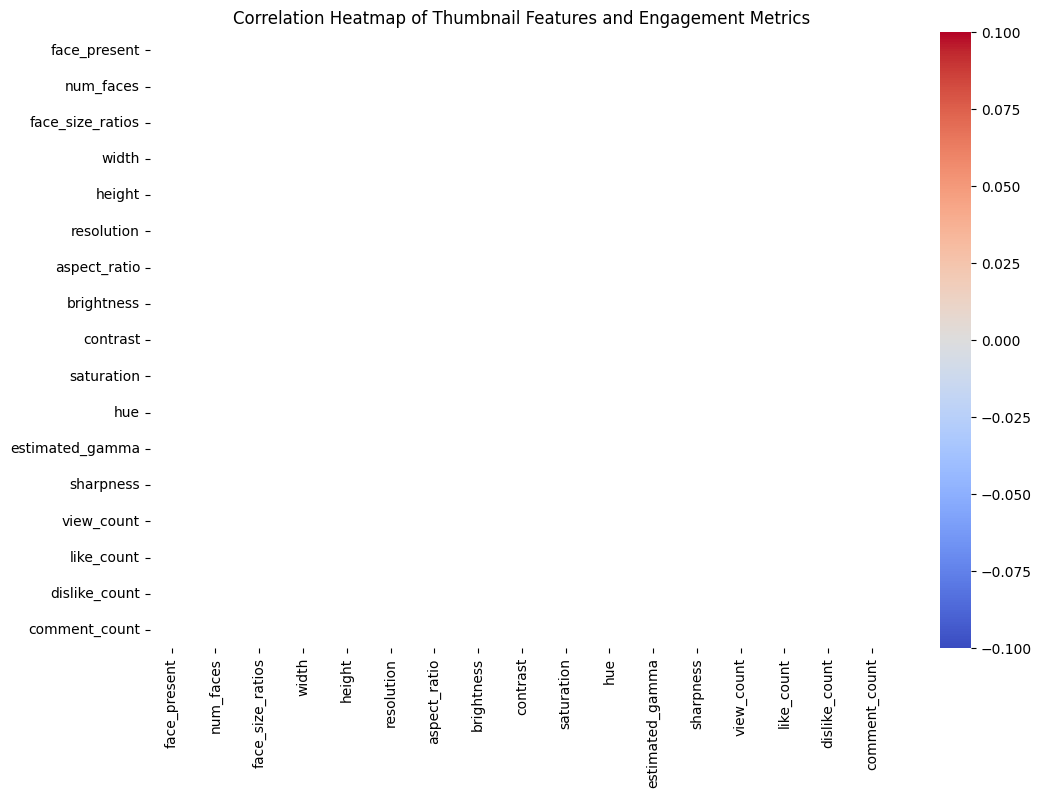

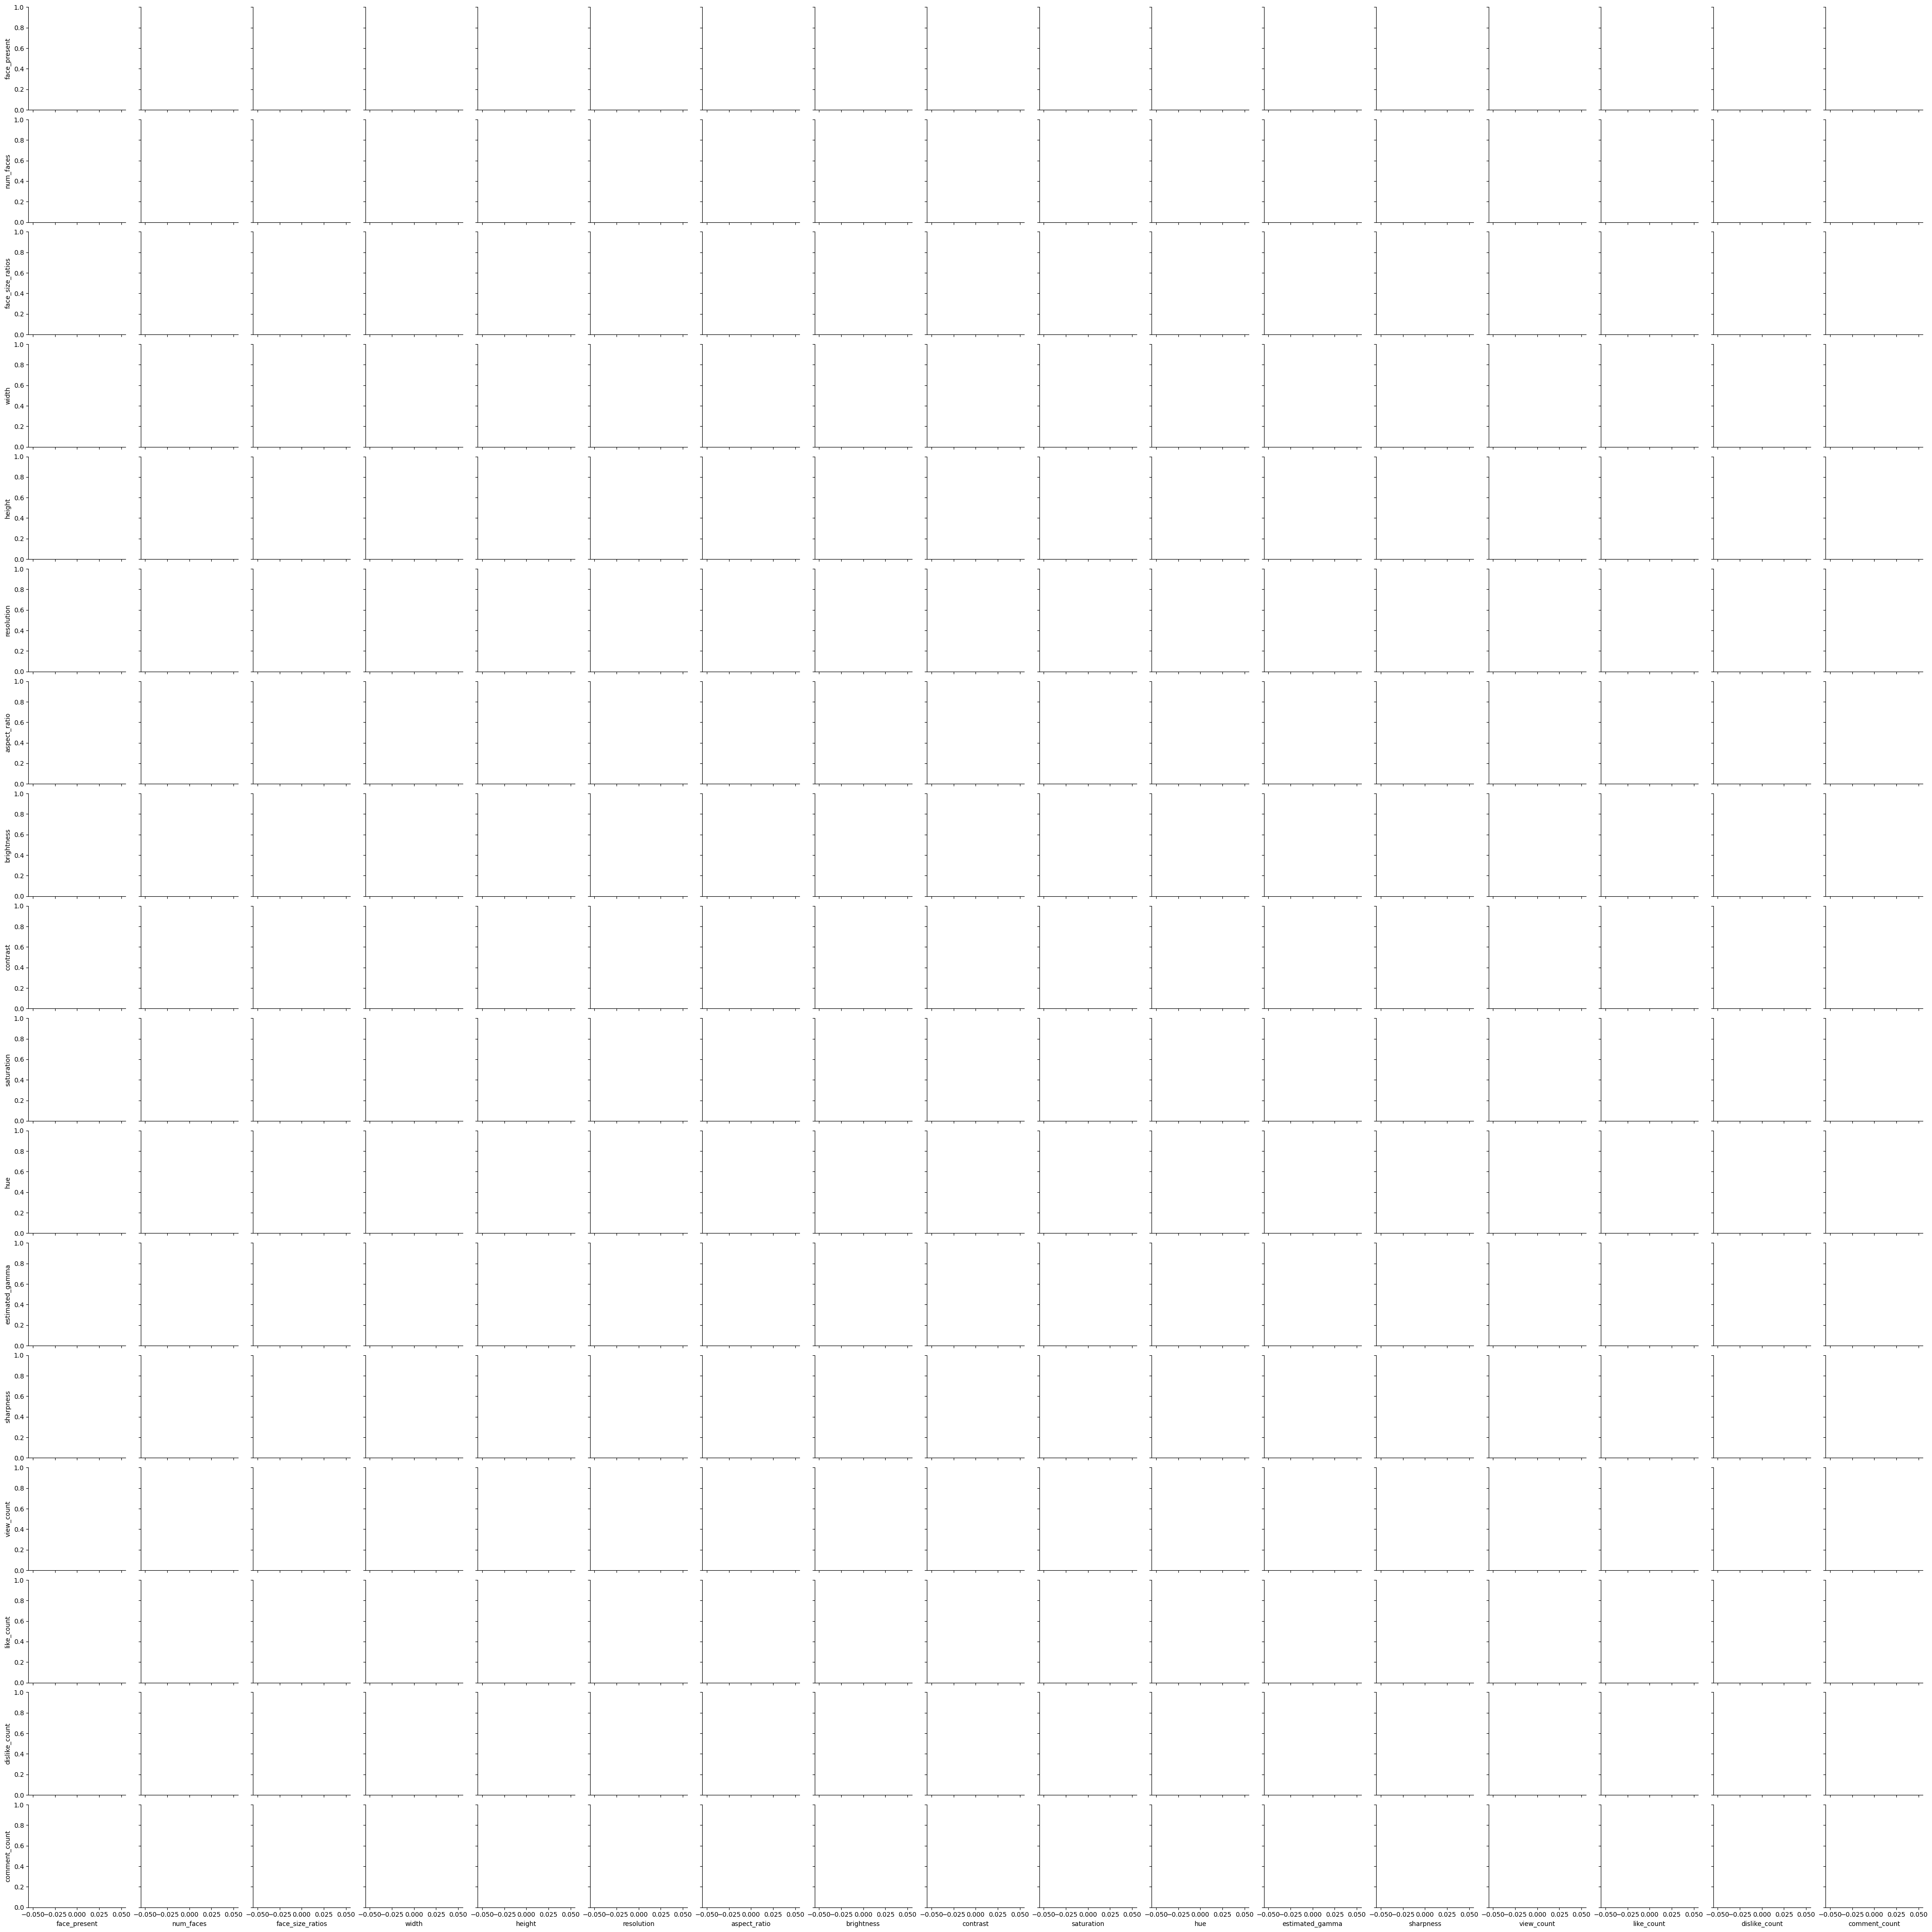

Top correlated thumbnail features with engagement metrics:
                  view_count  like_count  dislike_count  comment_count
face_present             NaN         NaN            NaN            NaN
num_faces                NaN         NaN            NaN            NaN
face_size_ratios         NaN         NaN            NaN            NaN
width                    NaN         NaN            NaN            NaN
height                   NaN         NaN            NaN            NaN
resolution               NaN         NaN            NaN            NaN
aspect_ratio             NaN         NaN            NaN            NaN
brightness               NaN         NaN            NaN            NaN
contrast                 NaN         NaN            NaN            NaN
saturation               NaN         NaN            NaN            NaN
hue                      NaN         NaN            NaN            NaN
estimated_gamma          NaN         NaN            NaN            NaN
sharpness         

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV files
thumbnail_df = pd.read_csv('thumbnail_analysis_results.csv')
videos_df = pd.read_csv('videos_metadata.csv')

# Merge the data on 'video_id'
merged_df = pd.merge(thumbnail_df, videos_df, on='video_id')

# Select relevant columns
features = ['face_present', 'num_faces', 'face_size_ratios', 'width', 'height', 'resolution',
            'aspect_ratio', 'brightness', 'contrast', 'saturation', 'hue',
            'estimated_gamma', 'sharpness']
targets = ['view_count', 'like_count', 'dislike_count', 'comment_count']

# Compute correlation matrix
correlation_matrix = merged_df[features + targets].corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Thumbnail Features and Engagement Metrics')
plt.show()

# Pairplot visualization for key features
sns.pairplot(merged_df, vars=features + targets, diag_kind='kde')
plt.show()

# Identify top correlated features
correlation_target = correlation_matrix.loc[features, targets]
print("Top correlated thumbnail features with engagement metrics:")
print(correlation_target.sort_values(by=targets, ascending=False))

# Regression Analysis
X = merged_df[features]
y = merged_df['view_count']  # Predicting view count

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

      video_id  face_present  num_faces face_size_ratios dominant_emotions  \
0  8dmz6PwFZ9A          True          1           0.0118           neutral   
1  DUAjCKCxkJ0          True          1           0.0014             angry   
2  GYS51snmbfk         False          0              NaN               NaN   
3  BQ2r5soiGok          True          2   0.0257, 0.0131        happy, sad   
4  FQ4J7h3FkCQ          True          1           0.0156             happy   

   width  height resolution  aspect_ratio  brightness  ...  estimated_gamma  \
0   1280     720   1280x720      1.777778   73.090750  ...         0.554712   
1   1280     720   1280x720      1.777778   60.502265  ...         0.481826   
2   1280     720   1280x720      1.777778   44.124299  ...         0.395124   
3   1280     720   1280x720      1.777778   54.662480  ...         0.450070   
4   1280     720   1280x720      1.777778   77.830092  ...         0.584079   

    sharpness  white_balance_deviation   exposure  \
0  

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


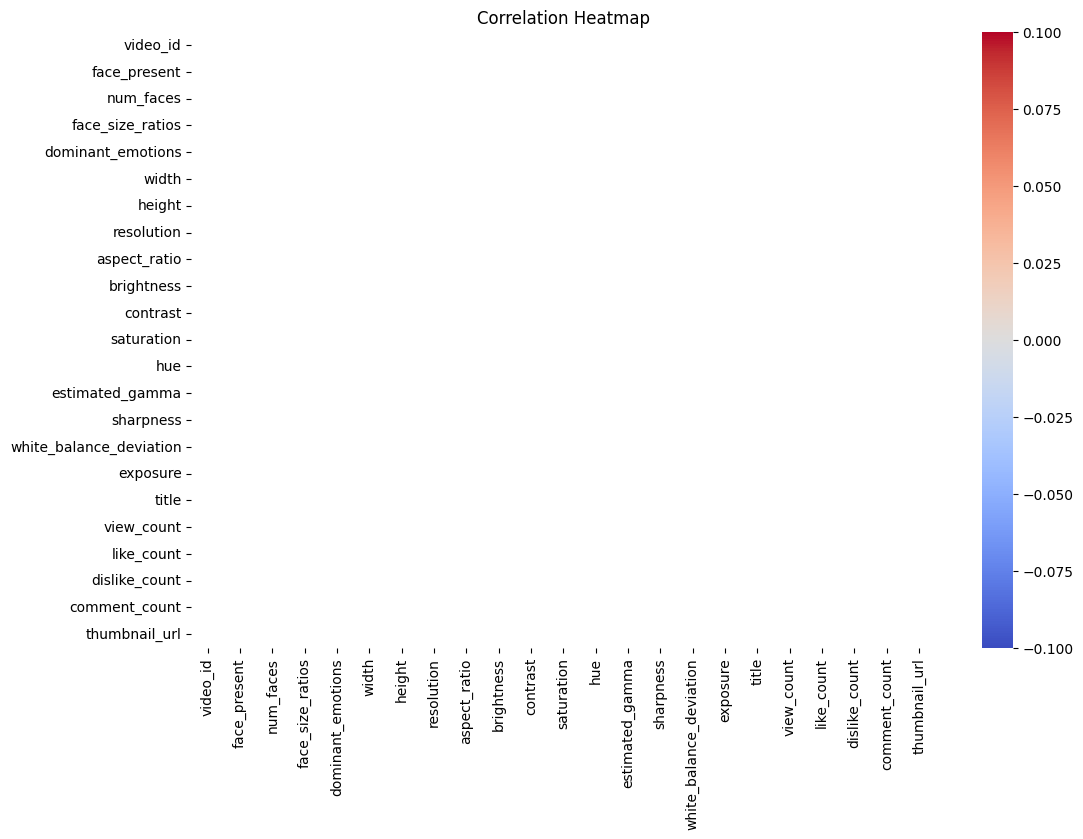

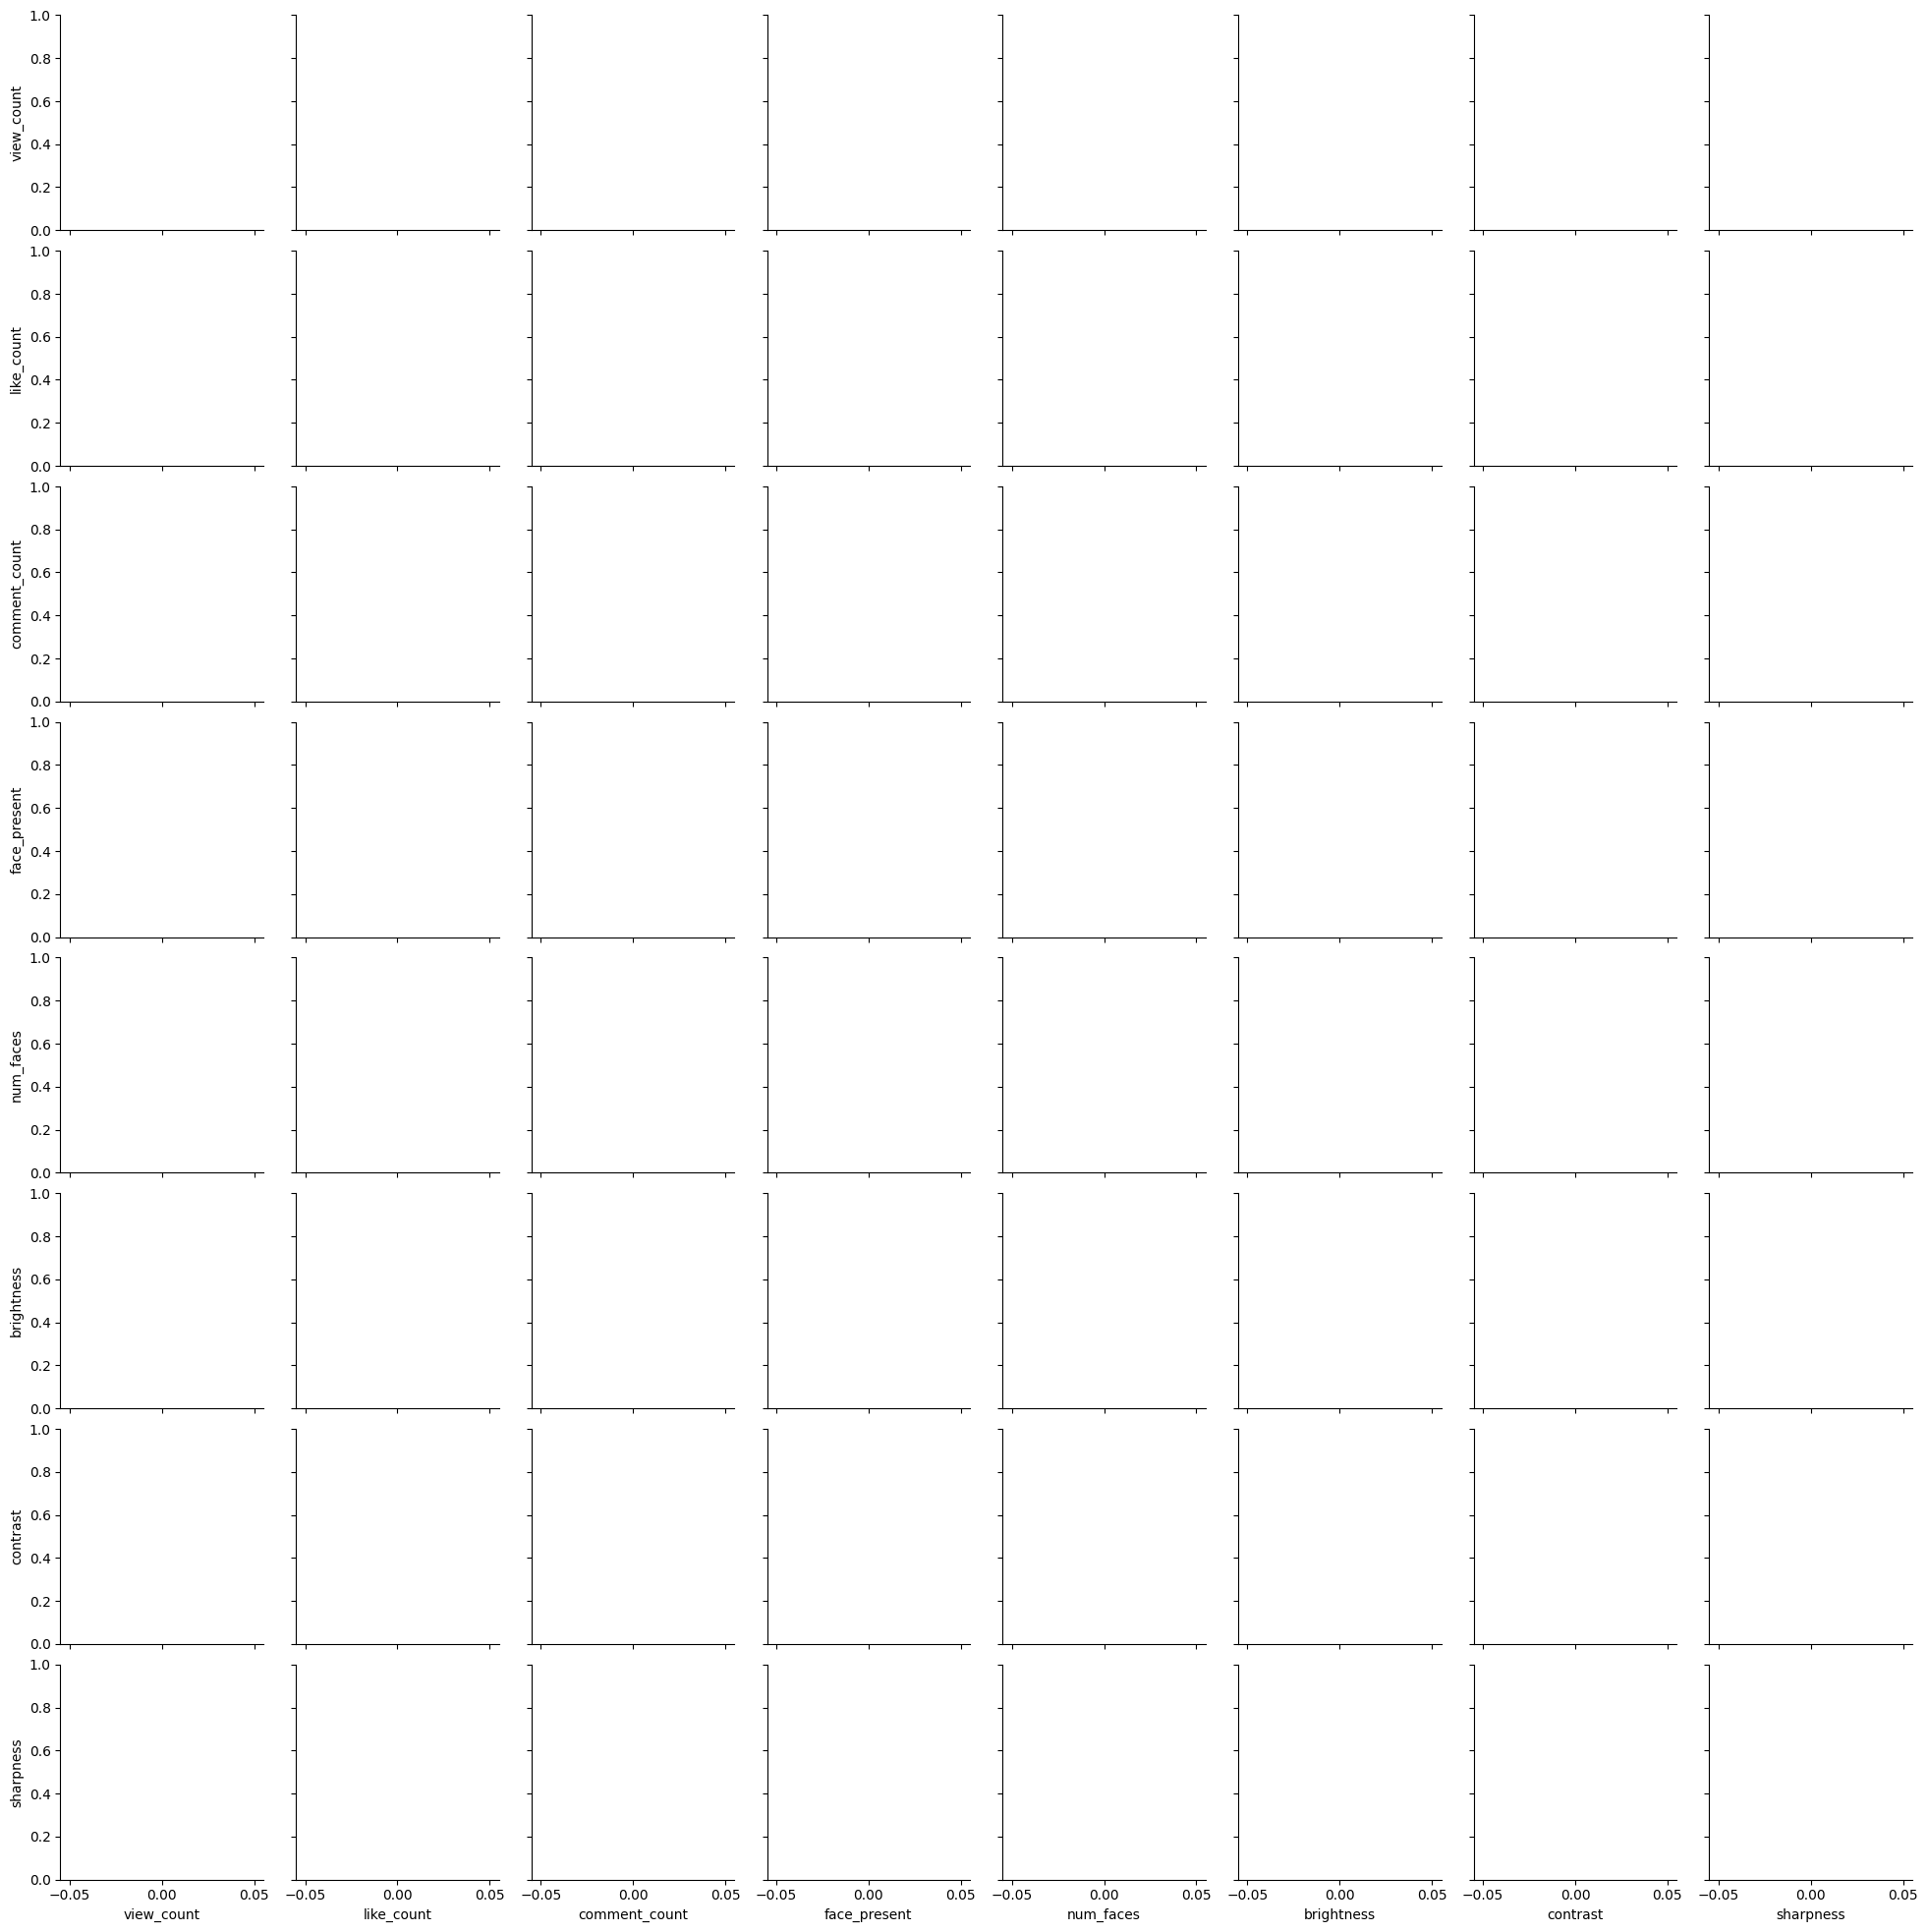

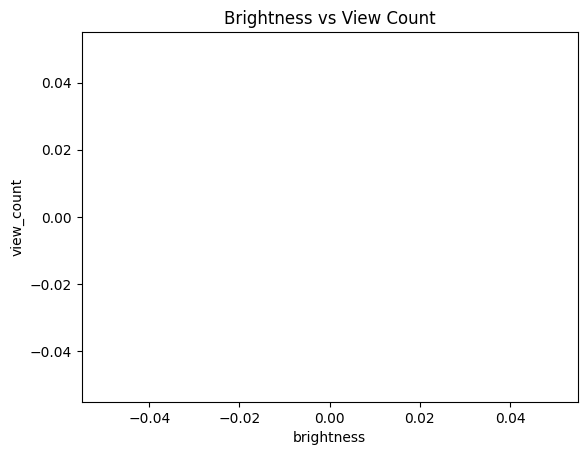

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the files
thumbnail_df = pd.read_excel('thumbnails_analysis.xlsx')
metadata_df = pd.read_csv('videos_metadata.csv')

# Merge datasets on video_id
merged_df = pd.merge(thumbnail_df, metadata_df, on='video_id')

# Display the first few rows to check the merged data
print(merged_df.head())

# Check for missing values
print(merged_df.isnull().sum())

# Convert categorical columns if necessary
numerical_columns = ['num_faces', 'face_size_ratios', 'width', 'height', 'resolution', 'aspect_ratio',
                      'brightness', 'contrast', 'saturation', 'hue', 'estimated_gamma', 'sharpness',
                      'view_count', 'like_count', 'dislike_count', 'comment_count']
merged_df[numerical_columns] = merged_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
merged_df = merged_df.dropna()

# Correlation analysis
correlation_matrix = merged_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for top influencing factors
sns.pairplot(merged_df[['view_count', 'like_count', 'comment_count', 'face_present', 'num_faces', 'brightness', 'contrast', 'sharpness']])
plt.show()

# Regression plot for a key variable (e.g., brightness vs view_count)
sns.regplot(x=merged_df['brightness'], y=merged_df['view_count'])
plt.title('Brightness vs View Count')
plt.show()

# Feature importance using a simple regression model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = merged_df[['face_present', 'num_faces', 'face_size_ratios', 'width', 'height', 'resolution', 'aspect_ratio', 'brightness', 'contrast', 'saturation', 'hue', 'estimated_gamma', 'sharpness']]
y = merged_df['view_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance plot
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for View Count')
plt.show()

# Save cleaned dataset
merged_df.to_csv('cleaned_thumbnail_analysis.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the files
thumbnail_df = pd.read_excel('thumbnails_analysis.xlsx')
metadata_df = pd.read_csv('videos_metadata.csv')

# Merge datasets on video_id
merged_df = pd.merge(thumbnail_df, metadata_df, on='video_id', how='inner')

# Check for missing values
print("Missing values before dropping:\n", merged_df.isnull().sum())

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Ensure numerical columns are correctly formatted
numerical_columns = ['num_faces', 'face_size_ratios', 'width', 'height', 'resolution',
                     'aspect_ratio', 'brightness', 'contrast', 'saturation', 'hue',
                     'estimated_gamma', 'sharpness', 'view_count']

merged_df[numerical_columns] = merged_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Ensure no NaN values remain
merged_df.dropna(inplace=True)

# Verify dataset size after preprocessing
print(f"Dataset size after cleaning: {merged_df.shape}")

# Define features (X) and target variable (y)
X = merged_df[['face_present', 'num_faces', 'face_size_ratios', 'width', 'height', 'resolution',
               'aspect_ratio', 'brightness', 'contrast', 'saturation', 'hue',
               'estimated_gamma', 'sharpness']]
y = merged_df['view_count']

# Check if X and y have data
print(f"Feature matrix size: {X.shape}, Target variable size: {y.shape}")

if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("Error: No valid samples after preprocessing. Check dataset merging and missing values.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR² Score: {r2}")

# Feature importance visualization
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for View Count')
plt.show()


Missing values before dropping:
 video_id                     0
face_present                 0
num_faces                    0
face_size_ratios           258
dominant_emotions          258
width                        0
height                       0
resolution                   0
aspect_ratio                 0
brightness                   0
contrast                     0
saturation                   0
hue                          0
estimated_gamma              0
sharpness                    0
white_balance_deviation      0
exposure                     0
title                        0
view_count                   0
like_count                   0
dislike_count                0
comment_count                0
thumbnail_url                0
dtype: int64
Dataset size after cleaning: (0, 23)
Feature matrix size: (0, 13), Target variable size: (0,)


ValueError: Error: No valid samples after preprocessing. Check dataset merging and missing values.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the files
thumbnail_df = pd.read_excel('thumbnails_analysis.xlsx')
metadata_df = pd.read_csv('videos_metadata.csv')

# Ensure video_id is of same type
thumbnail_df['video_id'] = thumbnail_df['video_id'].astype(str).str.strip()
metadata_df['video_id'] = metadata_df['video_id'].astype(str).str.strip()

# Merge datasets
merged_df = pd.merge(thumbnail_df, metadata_df, on='video_id', how='inner')

# Print dataset size after merging
print(f"Merged dataset shape: {merged_df.shape}")

# Drop columns with excessive missing values
merged_df.dropna(inplace=True)

# Convert numerical columns to proper format
numerical_columns = ['num_faces', 'face_size_ratios', 'width', 'height', 'resolution',
                     'aspect_ratio', 'brightness', 'contrast', 'saturation', 'hue',
                     'estimated_gamma', 'sharpness', 'view_count']

merged_df[numerical_columns] = merged_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values
merged_df.dropna(inplace=True)

# Check dataset size after cleaning
print(f"Final dataset size after preprocessing: {merged_df.shape}")

# Define features (X) and target variable (y)
X = merged_df[['face_present', 'num_faces', 'face_size_ratios', 'width', 'height', 'resolution',
               'aspect_ratio', 'brightness', 'contrast', 'saturation', 'hue',
               'estimated_gamma', 'sharpness']]
y = merged_df['view_count']

# Check if dataset has valid samples
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("Error: No valid samples after preprocessing. Check dataset merging and missing values.")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R² Score: {r2}")

# Plot feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for View Count')
plt.show()


Merged dataset shape: (495, 23)
Final dataset size after preprocessing: (0, 23)


ValueError: Error: No valid samples after preprocessing. Check dataset merging and missing values.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the datasets
thumbnail_df = pd.read_excel('thumbnails_analysis.xlsx')  # Corrected file name
metadata_df = pd.read_csv('videos_metadata.csv')

# Ensure 'video_id' is of the same type and strip spaces
thumbnail_df['video_id'] = thumbnail_df['video_id'].astype(str).str.strip()
metadata_df['video_id'] = metadata_df['video_id'].astype(str).str.strip()

# Merge datasets on 'video_id'
merged_df = pd.merge(thumbnail_df, metadata_df, on='video_id', how='inner')

# Print dataset shape after merging
print(f"Merged dataset shape: {merged_df.shape}")

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Convert numerical columns to proper format
numerical_columns = ['num_faces', 'face_size_ratios', 'width', 'height', 'resolution',
                     'aspect_ratio', 'brightness', 'contrast', 'saturation', 'hue',
                     'estimated_gamma', 'sharpness', 'view_count']

merged_df[numerical_columns] = merged_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values again after conversion
merged_df.dropna(inplace=True)

# Print final dataset shape after cleaning
print(f"Final dataset shape after preprocessing: {merged_df.shape}")

# Define features (X) and target variable (y)
X = merged_df[['face_present', 'num_faces', 'face_size_ratios', 'width', 'height', 'resolution',
               'aspect_ratio', 'brightness', 'contrast', 'saturation', 'hue',
               'estimated_gamma', 'sharpness']]
y = merged_df['view_count']

# Check if dataset has valid samples
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("Error: No valid samples after preprocessing. Check dataset merging and missing values.")

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print regression results
print("\n📊 Regression Results for `view_count`")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for View Count')
plt.show()


Merged dataset shape: (495, 23)
Final dataset shape after preprocessing: (0, 23)


ValueError: Error: No valid samples after preprocessing. Check dataset merging and missing values.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the datasets
thumbnail_df = pd.read_excel('thumbnails_analysis.xlsx')  # Corrected file name
metadata_df = pd.read_csv('videos_metadata.csv')

# Convert video_id to string and strip spaces
thumbnail_df['video_id'] = thumbnail_df['video_id'].astype(str).str.strip()
metadata_df['video_id'] = metadata_df['video_id'].astype(str).str.strip()

# Merge datasets on 'video_id'
merged_df = pd.merge(thumbnail_df, metadata_df, on='video_id', how='inner')

# Debug: Print merged dataset shape
print(f"Merged dataset shape: {merged_df.shape}")
print("\nMissing values before dropping NaN:")
print(merged_df.isna().sum())

# Convert numerical columns to correct format
numerical_columns = ['num_faces', 'face_size_ratios', 'width', 'height', 'resolution',
                     'aspect_ratio', 'brightness', 'contrast', 'saturation', 'hue',
                     'estimated_gamma', 'sharpness', 'view_count']

for col in numerical_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Debug: Print column data types
print("\nData types after conversion:")
print(merged_df.dtypes)

# Drop rows with NaN values
merged_df.dropna(inplace=True)

# Debug: Print final dataset shape after cleaning
print(f"\nFinal dataset shape after preprocessing: {merged_df.shape}")

# Define features (X) and target variable (y)
X = merged_df[['face_present', 'num_faces', 'face_size_ratios', 'width', 'height', 'resolution',
               'aspect_ratio', 'brightness', 'contrast', 'saturation', 'hue',
               'estimated_gamma', 'sharpness']]
y = merged_df['view_count']

# Final validation before training
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("Error: No valid samples after preprocessing. Check dataset merging and missing values.")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print regression results
print("\n📊 Regression Results for `view_count`")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Merged dataset shape: (495, 23)

Missing values before dropping NaN:
video_id                     0
face_present                 0
num_faces                    0
face_size_ratios           258
dominant_emotions          258
width                        0
height                       0
resolution                   0
aspect_ratio                 0
brightness                   0
contrast                     0
saturation                   0
hue                          0
estimated_gamma              0
sharpness                    0
white_balance_deviation      0
exposure                     0
title                        0
view_count                   0
like_count                   0
dislike_count                0
comment_count                0
thumbnail_url                0
dtype: int64

Data types after conversion:
video_id                    object
face_present                  bool
num_faces                    int64
face_size_ratios           float64
dominant_emotions           object


ValueError: Error: No valid samples after preprocessing. Check dataset merging and missing values.